In [1]:
import sys
sys.path.insert(0, '/home/guliver/projects/Comp_assisted_math')
from numpy import vstack
from scipy.interpolate import lagrange
from util import Plotter
from regression import regression, trig_regression_ez, trig_regression_med

After importing all the necessary files, we will demonstrate few of the options of the code.
But first we have to define the parameters that we will work with

In [2]:
POINT_COUNT = 20
REGRESSAND_DEGREE = 3
assert POINT_COUNT > REGRESSAND_DEGREE # making sure we're not getting a perfect fit.

# different parameters for what we want to see on our graph
DRAW_PTS = True
DRAW_STEM = True
DRAW_REGRESSION = True
DRAW_TRIG_EZ = False
DRAW_TRIG_MED = False
DRAW_ERRORS = True
DRAW_LAGRANGE = False

We first initialize an object 'plotter' of the Plotter class, which deals with all the plotting related functions.

We will now define a stem function, around which we will add 'noisey' points,
 to serve as our data set of points we want to approximate.

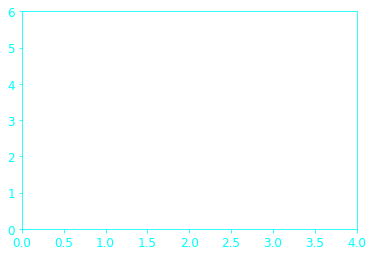

In [3]:
plotter = Plotter()

kek


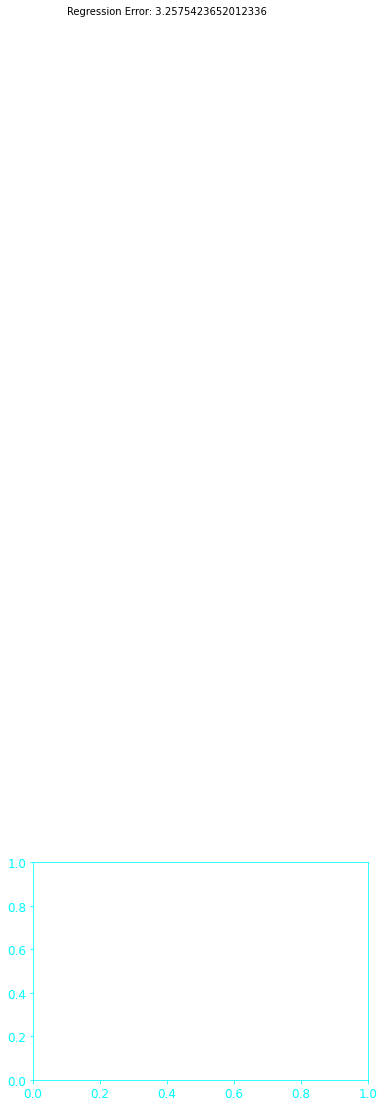

In [4]:
stem_func = lambda x: 0.5 * x**2
pts = plotter.get_datapts(stem_func, POINT_COUNT, 1, seed=0)
plotter.plot_pts(pts[0], pts[1], 'o', color=(1,0,1))
if DRAW_PTS:
    plotter.plot_pts(pts[0], pts[1], 'o', color=(1, 0, 1))
if DRAW_STEM:
    plotter.plot_func(stem_func)
if DRAW_REGRESSION:
    plotter.plot_func(regression(pts, REGRESSAND_DEGREE), color=(0,1,0))
if DRAW_LAGRANGE:
    plotter.plot_func(lagrange(pts[0], pts[1]), color = (1,0,0))
if DRAW_TRIG_EZ:
    plotter.plot_func(trig_regression_ez(pts), color = (1,0,0))
if DRAW_TRIG_MED:
    plotter.plot_func(trig_regression_med(pts), color = (1,0,0))
if DRAW_ERRORS:
    xx = vstack([pts[0], pts[0]])
    yy = vstack([pts[1], regression(pts, REGRESSAND_DEGREE)(pts[0])])
    plotter.plot_pts(xx, yy, ".-.", color=(1, 0.5, 0))
    reg_func = lambda x: regression(pts, REGRESSAND_DEGREE)(x)
    plotter.measure_error(reg_func, pts[1])
plotter.show()